In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/siriuslee/ast596_2020_Spring/data/01/IntroStat_demo.csv')

In [3]:
data

,time,mag.hom,mag.outlier,mag.t,mag.het,mag.het.error,mag5,mag5.error
0,0.000000,18.558944,18.530677,18.560527,18.567447,0.067345,18.546056,0.009766
1,0.176158,18.531178,18.551560,18.549906,18.547315,0.017149,18.542605,0.007709
2,0.250165,18.553669,18.468095,18.544618,18.564191,0.020600,18.536269,0.009777
3,1.426983,18.539475,18.537368,18.560818,18.554162,0.074339,18.545782,0.008705
4,1.677148,18.575442,18.790521,18.556126,18.514765,0.027469,18.553644,0.010084
...,...,...,...,...,...,...,...,...
69,10.757089,18.537689,18.571678,18.543100,18.466822,0.045315,18.584009,0.013740
70,10.933247,18.553604,18.554656,18.534926,18.630141,0.072181,18.564123,0.005873
71,11.007254,18.547965,18.553508,18.542977,18.568285,0.087981,18.566357,0.009845
72,11.507584,18.558160,18.558386,18.548952,18.462255,0.087348,18.581563,0.003851


In [4]:
data.keys()

Index(['time', 'mag.hom', 'mag.outlier', 'mag.t', 'mag.het', 'mag.het.error',
       'mag5', 'mag5.error'],
      dtype='object')

In [5]:
data['mag.outlier']

0     18.530677
1     18.551560
2     18.468095
3     18.537368
4     18.790521
        ...    
69    18.571678
70    18.554656
71    18.553508
72    18.558386
73    18.518463
Name: mag.outlier, Length: 74, dtype: float64

In [6]:
import numpy as np
mag_outlier = np.array(data['mag.outlier'])

In [7]:
mag_outlier

array([18.53067741, 18.55156043, 18.46809544, 18.53736824, 18.79052101,
       18.5484733 , 18.57389487, 18.58385375, 18.55051367, 18.55627943,
       18.55570376, 18.55495439, 18.54837424, 18.54155049, 18.54333728,
       18.53924894, 18.77060703, 18.56263718, 18.52214174, 18.56785208,
       19.05058968, 18.55695516, 18.5586264 , 18.5662732 , 18.54577395,
       18.54960564, 18.53814685, 18.53747636, 18.50675539, 18.57006176,
       18.57850418, 18.51872247, 18.55245687, 18.55933597, 18.5531114 ,
       18.57421901, 18.57754636, 18.56309729, 18.55914489, 18.52396585,
       18.55902283, 18.56014149, 18.5565164 , 18.51997416, 18.55759143,
       18.56565219, 18.51953343, 18.56716842, 18.5112243 , 18.52635593,
       18.55538613, 18.54720653, 18.54499055, 18.54707486, 18.55391538,
       18.52823706, 18.53023576, 18.57273861, 18.55503703, 18.53444977,
       18.56384012, 18.52966415, 18.56417305, 18.53060676, 18.55450872,
       18.52899907, 18.54325478, 18.53198869, 18.56591053, 18.57

In [33]:
Mean = np.mean(mag_outlier)
Sigma = np.var(mag_outlier)
print(Mean)
print(Sigma)

18.561082466856572
0.005081094393001044


In [9]:
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt

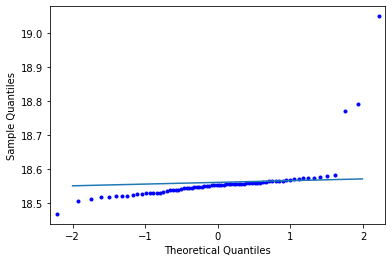

In [10]:
sm.qqplot(mag_outlier, marker = '.') 

X = np.arange(-2, 2, 0.01)
Y = Mean + Sigma*X
plt.plot(X, Y)

plt.show()

In [11]:
mag_outlier.shape

(74,)

In [12]:
Q1 = np.quantile(mag_outlier, 0.25)
Q1

18.5373952724961

In [13]:
Q3 = np.quantile(mag_outlier, 0.75)
Q3

18.56298225840465

In [14]:
x = np.arange(-3, 3.01, 0.01)

In [17]:
import scipy.stats as st
from matplotlib.pyplot import *

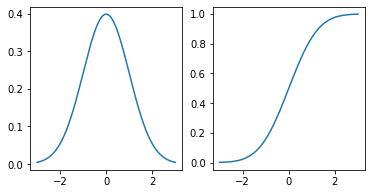

In [18]:
fig = figure(figsize=(6, 3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pdf = st.norm.pdf(x)
cdf = st.norm.cdf(x)
ax1.plot(x, pdf)
ax2.plot(x, cdf)

p = np.arange(0, 1.01, 0.01)

# to get inverse of cdf use "ppf"
icdf = st.norm.ppf(p)

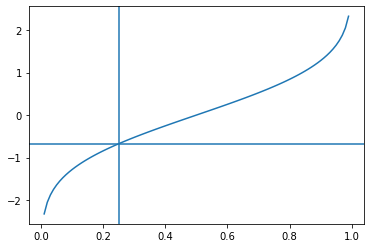

In [19]:
figure()
plot(p, icdf)
axhline(st.norm.ppf(0.25))
axvline(0.25)

In [20]:
st.norm.ppf(0.25)

-0.6744897501960817

In [21]:
st.norm.ppf(0.75)

0.6744897501960817

In [22]:
x1 = st.norm.ppf(0.25)
x3 = st.norm.ppf(0.75)
x3

0.6744897501960817

In [23]:
# the coordinate of the 1st quantile is P1(x1,Q1)
# the coordinate of the 1st quantile is P3(x3,Q3)

P1 = [x1, Q1]
P3 = [x3, Q3]

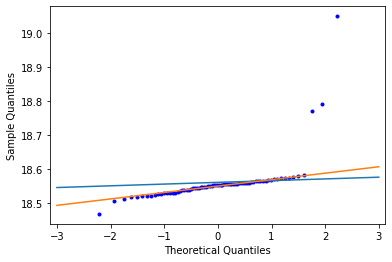

In [24]:
sm.qqplot(mag_outlier, marker = '.') 

X = np.arange(-3, 3.01, 0.01)
Y = Mean + Sigma*X
plt.plot(X, Y)

y = (Q3 - Q1)/(x3 - x1) * (x - x1) + Q1
plt.plot(x,y)

plt.show()

To deal with mag.het below

In [25]:
data['mag.het']
mag_het = np.array(data['mag.het'])
mag_het

array([18.56744724, 18.54731521, 18.56419068, 18.5541624 , 18.51476539,
       18.5511345 , 18.54637707, 18.50968173, 18.62045483, 18.56212405,
       18.5478436 , 18.54603615, 18.52103588, 18.55643022, 18.54581481,
       18.41634004, 18.59560259, 18.58287343, 18.48456726, 18.52402588,
       18.55944649, 18.53263678, 18.57224504, 18.56911423, 18.55500408,
       18.56128636, 18.52806689, 18.6086036 , 18.48342552, 18.5562747 ,
       18.46310897, 18.45882742, 18.54189051, 18.42744089, 18.5840574 ,
       18.54869751, 18.57086632, 18.5157921 , 18.51103683, 18.54529733,
       18.58886875, 18.56779579, 18.53331277, 18.51184323, 18.55178825,
       18.57145667, 18.58207136, 18.56968089, 18.58108356, 18.49660612,
       18.62131203, 18.59708403, 18.59031956, 18.5550137 , 18.53869323,
       18.55523089, 18.49412813, 18.68629647, 18.55407781, 18.52094029,
       18.53506124, 18.54911523, 18.53542691, 18.5800183 , 18.5352171 ,
       18.62700408, 18.55241712, 18.5628622 , 18.56768699, 18.46

18.54834115592681
0.002051771742037422


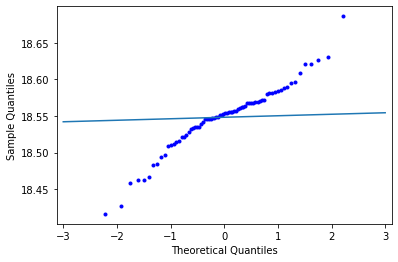

In [34]:
Mean_het = np.mean(mag_het)
Sigma_het = np.var(mag_het)

print(Mean_het)
print(Sigma_het)

sm.qqplot(mag_het, marker = '.') 

X_het = np.arange(-3, 3.01, 0.01)
Y_het = Mean_het + Sigma_het*X
plt.plot(X_het, Y_het)

plt.show()

In [28]:
Q1_het = np.quantile(mag_het, 0.25)
Q3_het = np.quantile(mag_het, 0.75)

x1_het = st.norm.ppf(0.25)
x3_het = st.norm.ppf(0.75)

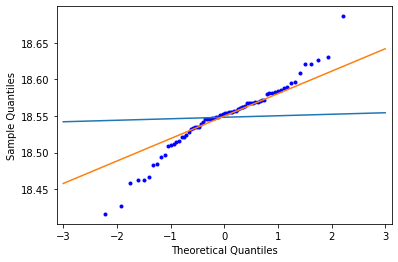

In [29]:
# the coordinate of the 1st quantile is P1_het(x1_het,Q1_het)
# the coordinate of the 1st quantile is P3_het(x3_het,Q3_het)

P1_het = [x1_het, Q1_het]
P3_het = [x3_het, Q3_het]

sm.qqplot(mag_het, marker = '.') 

X_het = np.arange(-3, 3.01, 0.01)
Y_het = Mean_het + Sigma_het*X
plt.plot(X_het, Y_het)

y = (Q3_het - Q1_het)/(x3_het - x1_het) * (x - x1_het) + Q1_het
plt.plot(x,y)

plt.show()

In [35]:
mag_het.shape

(74,)

In [36]:
# if rescale the data:
data['mag.het.error']
mag_het_error = np.array(data['mag.het.error'])
a = np.ones((1, 74))
new_data = (mag_het - Mean_het * a) / mag_het_error
new_data

array([[ 0.28370558, -0.05982671,  0.76937907,  0.078307  , -1.22231636,
         2.18178322, -0.05090111, -1.24015771,  2.3902915 ,  1.67055388,
        -0.00980345, -0.02846275, -0.29209572,  0.66623933, -0.19643021,
        -1.4775252 ,  0.77726758,  0.63048683, -0.76915934, -0.57455631,
         0.14379444, -0.55984544,  0.30336506,  1.6529738 ,  0.15666077,
         0.18438828, -0.86702484,  1.16166967, -1.0592497 ,  0.08160363,
        -0.91862462, -1.25913408, -0.13754099, -1.85076254,  1.11366889,
         0.00460168,  0.24469162, -0.59293061, -0.43462034, -0.03704152,
         0.43949241,  0.35449859, -0.1957191 , -0.88016976,  1.61621622,
         0.50568682,  1.00138292,  0.3461175 ,  0.47817855, -1.43232226,
         0.74059951,  1.06365075,  0.61845141,  1.03428235, -0.45271831,
         0.50847198, -0.6123332 ,  1.69723036,  0.10867765, -1.17438753,
        -0.18881922,  0.26236299, -0.56667057,  0.42889477, -0.52451403,
         1.23080828,  0.10037595,  1.24987937,  0.4

0.11479798948895799
0.8235457747487397


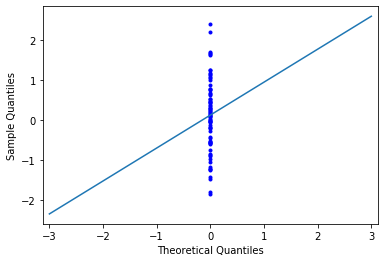

In [37]:
Mean_new = np.mean(new_data)
Sigma_new = np.var(new_data)

print(Mean_new)
print(Sigma_new)

sm.qqplot(new_data, marker = '.') 

X_new = np.arange(-3, 3.01, 0.01)
Y_new = Mean_new + Sigma_new*X
plt.plot(X_new, Y_new)

plt.show()

In [38]:
Q1_new = np.quantile(new_data, 0.25)
Q3_new = np.quantile(new_data, 0.75)

x1_new = st.norm.ppf(0.25)
x3_new = st.norm.ppf(0.75)

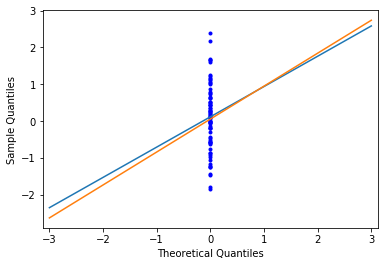

In [39]:
# the coordinate of the 1st quantile is P1_new(x1_new,Q1_new)
# the coordinate of the 1st quantile is P3_new(x3_new,Q3_new)

P1_new = [x1_new, Q1_new]
P3_new = [x3_new, Q3_new]

sm.qqplot(new_data, marker = '.') 

X_new = np.arange(-3, 3.01, 0.01)
Y_new = Mean_new + Sigma_new*X
plt.plot(X_new, Y_new)

y = (Q3_new - Q1_new)/(x3_new - x1_new) * (x - x1_new) + Q1_new
plt.plot(x,y)

plt.show()